### Linear Regression Analysis

In [1]:
%matplotlib notebook

# Dependencies
from matplotlib import pyplot as plt
from scipy import stats
import numpy as np
import pandas as pd
import import_ipynb
import matplotlib.patches as mpatches

In [2]:
# Load files
google_maps_df = pd.read_csv("Google_resources/Output/googlemaps_final2.csv")

zillow_median_price_df = pd.read_csv("Zillow_resources/Output/City_MedianListingPrice_AllHomes_final.csv")
days_on_zillow_df = pd.read_csv("Zillow_resources/Output/DaysOnZillow_City_final.csv")
zillow_monthly_listings_df = pd.read_csv("Zillow_resources/Output/MonthlyListings_NSA_AllHomes_City_final.csv")

# Remove first two months to avoid null data for days on Zillow
zillow_median_price_df = zillow_median_price_df.drop(columns=["2017-01", "2017-02"])

days_on_zillow_df = days_on_zillow_df.drop(columns=["2017-01", "2017-02"])

zillow_monthly_listings_df = zillow_monthly_listings_df.drop(columns=["2017-01", "2017-02"])

# Drop row with null data for new monthly listings
zillow_monthly_listings_df.dropna(how="any", inplace=True)

# Drop Lat and Lng from google maps data
public_transportation_df = google_maps_df.drop(columns=["Lat", "Lng"])

# Create public transportation dataframe that only includes cities found in zillow monthly listings dataframe
new_monthly_listings_cities_df = zillow_monthly_listings_df.loc[:,["CITY", "STATE"]]

new_monthly_listings_public_transportation_df = pd.merge(new_monthly_listings_cities_df, public_transportation_df, how="left", on=("CITY", "STATE"))

# Display public transporation dataframe for top 20 cities
public_transportation_df

,CITY,STATE,bus_station,train_station,transit_station,subway_station,airport,taxi_stand
0,New York,NY,60,22,60,60,38,11
1,Los Angeles,CA,60,5,60,14,35,4
2,Chicago,IL,60,22,60,60,17,2
3,Houston,TX,60,1,60,0,45,0
4,Phoenix,AZ,60,4,60,0,34,1
5,Philadelphia,PA,60,40,60,49,29,0
6,San Antonio,TX,60,1,60,0,13,1
7,San Diego,CA,60,4,60,0,23,0
8,Dallas,TX,60,3,60,0,26,1
9,San Jose,CA,60,6,60,0,21,3


In [3]:
# Calculate avg median price (monthly average)
avg_median_price_by_city = zillow_median_price_df.mean(axis=1)
avg_median_price_by_city_df = avg_median_price_by_city.to_frame()

# Calculate avg days on zillow (monthly average)
avg_days_on_zillow = days_on_zillow_df.mean(axis=1)
avg_days_on_zillow_df = avg_days_on_zillow.to_frame()

# Calculate avg new monthly listings (monthly average)
avg_monthly_listings = zillow_monthly_listings_df.mean(axis=1)
avg_monthly_listings_df = avg_monthly_listings.to_frame()

# Calculate sum of public transportation services for new monthly listings
sum_nml_public_transportation = new_monthly_listings_public_transportation_df.sum(axis=1)
sum_nml_public_transportation_df = sum_nml_public_transportation.to_frame()

# Calculate sum of public transportation services for days on Zillow and median price
sum_public_transportation = public_transportation_df.sum(axis=1)
sum_public_transportation_df = sum_public_transportation.to_frame()

sum_public_transportation_df

,0
0,251
1,178
2,221
3,166
4,159
5,238
6,135
7,147
8,150
9,150


<IPython.core.display.Javascript object>


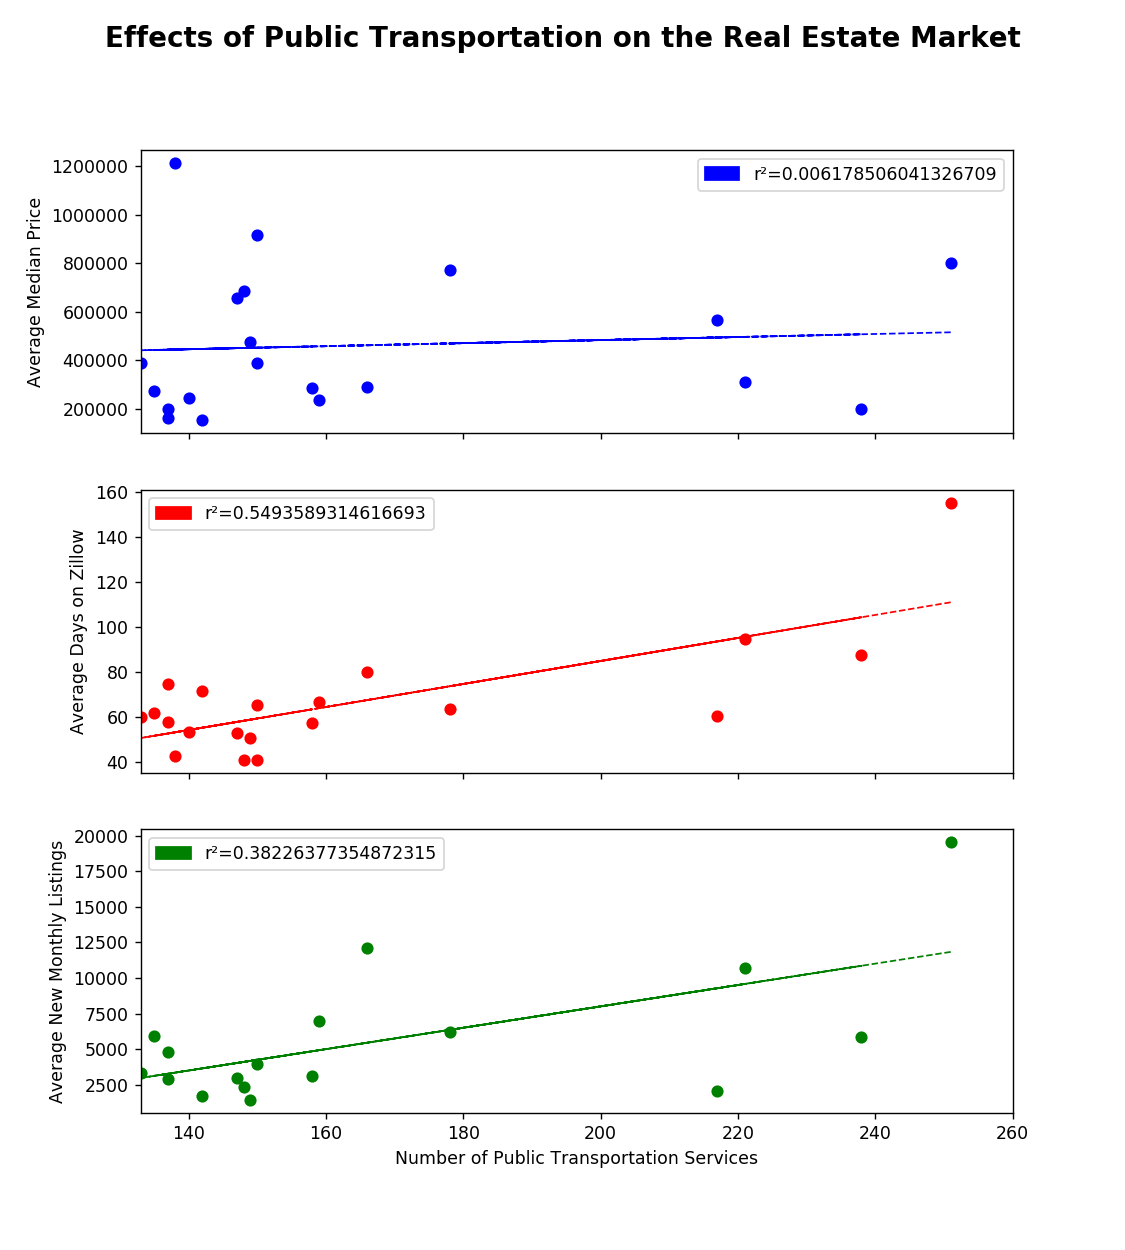

R value for average median price is 0.07860347346858604
R value for average days on Zillow is 0.7411875143724894
R value for average new monthly listings is 0.618274836580564

R squared value for average median price is 0.006178506041326709
R squared value for average days on Zillow is 0.5493589314616693
R squared value for average new monthly listings is 0.38226377354872315


In [4]:
# Setup public transporation number variables
num_transportation = sum_public_transportation
num_nml_transportation = sum_nml_public_transportation

# Grab avg median price
avg_median_price = avg_median_price_by_city
amp_slope, amp_int, amp_r, amp_p, amp_std_err = stats.linregress(
    num_transportation, avg_median_price)
amp_fit = amp_slope * num_transportation + amp_int

# Grab days on zillow
avg_days_zillow = avg_days_on_zillow
adz_slope, adz_int, adz_r, adz_p, adz_std_err = stats.linregress(
    num_transportation, avg_days_zillow)
adz_fit = adz_slope * num_transportation + adz_int

# Grab new monthly listings
avg_new_monthly_listings = avg_monthly_listings
anml_slope, anml_int, anml_r, anml_p, anml_std_err = stats.linregress(
    num_nml_transportation, avg_new_monthly_listings)
anml_fit = anml_slope * num_nml_transportation + anml_int

# Square the r values
amp_r2 = amp_r * amp_r
adz_r2 = adz_r * adz_r
anml_r2 = anml_r * anml_r

# Generate plot
fig, (ax1, ax2, ax3) = plt.subplots(3, figsize=(9, 10), sharex=True)
fig.suptitle("Effects of Public Transportation on the Real Estate Market", fontsize=16, fontweight="bold")

ax1.set_xlim(min(num_transportation), max(num_transportation) + 9)

ax1.plot(num_transportation, avg_median_price, linestyle="none", marker="o", color="b")
ax1.plot(num_transportation, amp_fit, "b--", linewidth=1)
ax1.set_ylabel("Average Median Price")

blue_patch = mpatches.Patch(color='blue', label=f'r\u00b2={amp_r2}')
ax1.legend(handles=[blue_patch])

ax2.plot(num_transportation, avg_days_zillow, linestyle="none", marker="o", color="r")
ax2.plot(num_transportation, adz_fit, "r--", linewidth=1)
ax2.set_ylabel("Average Days on Zillow")

red_patch = mpatches.Patch(color='red', label=f'r\u00b2={adz_r2}')
ax2.legend(handles=[red_patch])

ax3.plot(num_nml_transportation, avg_new_monthly_listings, linestyle="none", marker="o", color="g")
ax3.plot(num_nml_transportation, anml_fit, "g--", linewidth=1)
ax3.set_ylabel("Average New Monthly Listings")

green_patch = mpatches.Patch(color='green', label=f'r\u00b2={anml_r2}')
ax3.legend(handles=[green_patch])

ax3.set_xlabel("Number of Public Transportation Services")

print(f"R value for average median price is {amp_r}")
print(f"R value for average days on Zillow is {adz_r}")
print(f"R value for average new monthly listings is {anml_r}")
print("")
print(f"R squared value for average median price is {amp_r2}")
print(f"R squared value for average days on Zillow is {adz_r2}")
print(f"R squared value for average new monthly listings is {anml_r2}")


plt.savefig("Matplotlib_resources/regression_plot.png")

In [5]:
# Get airport data for new monthly listings
nml_airport_data = new_monthly_listings_public_transportation_df.loc[:,"airport"]
nml_airport_df = nml_airport_data.to_frame()

# Get airport data for days on Zillow and median price
airport_data = public_transportation_df.loc[:,"airport"]
airport_df = airport_data.to_frame()
airport_df

,airport
0,38
1,35
2,17
3,45
4,34
5,29
6,13
7,23
8,26
9,21


<IPython.core.display.Javascript object>


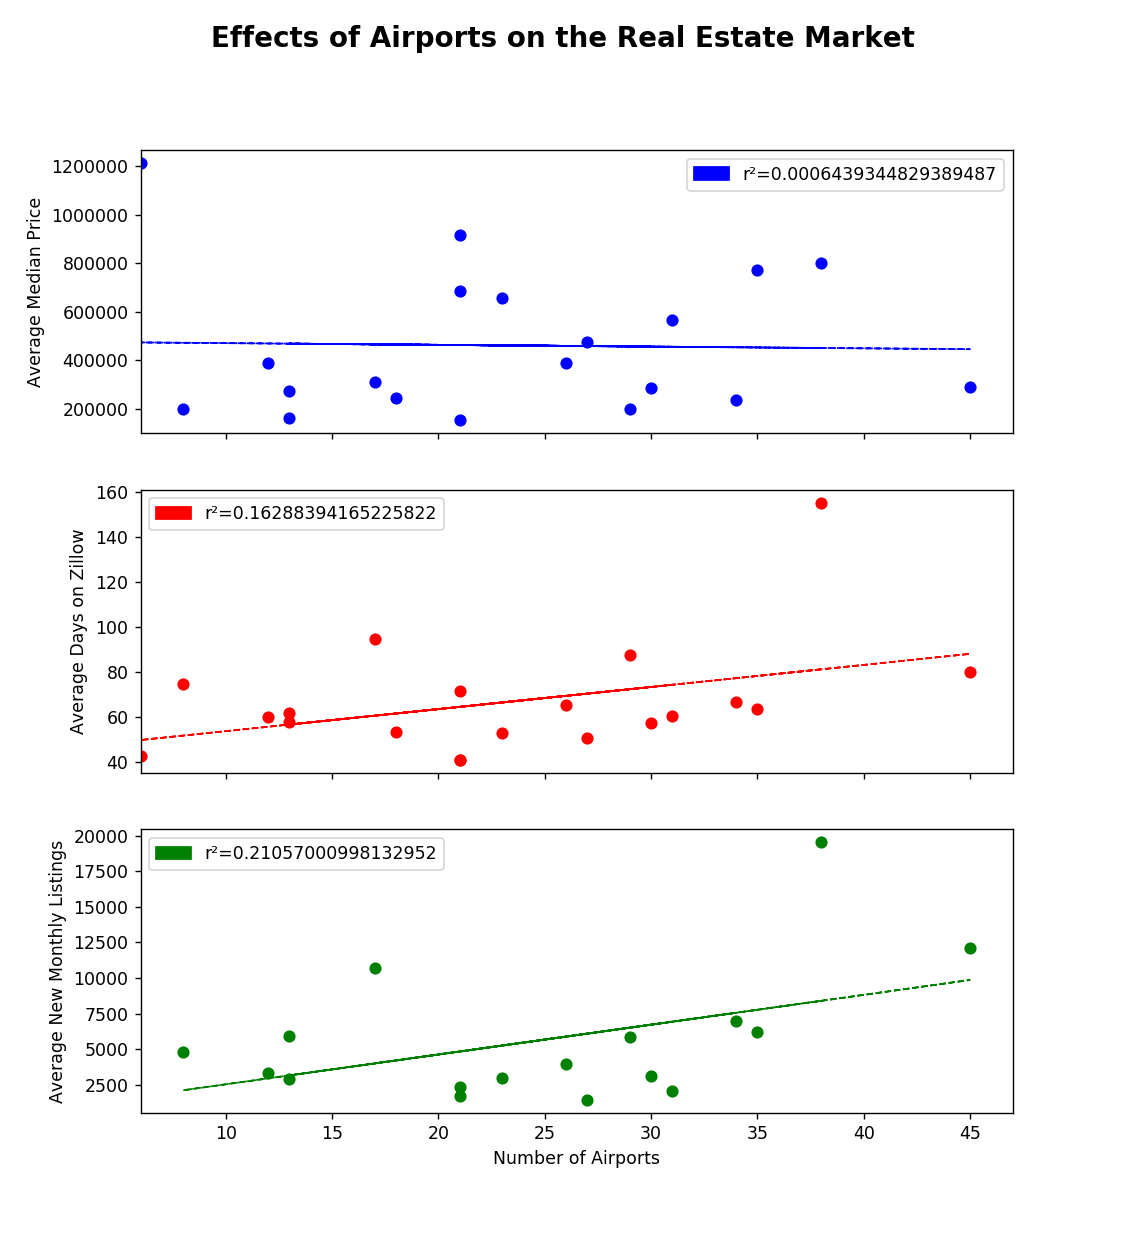

R value for average median price is -0.025375864181125904
R value for average days on Zillow is 0.4035888274621316
R value for average new monthly listings is 0.4588790799124858

R squared value for average median price is 0.0006439344829389487
R squared value for average days on Zillow is 0.16288394165225822
R squared value for average new monthly listings is 0.21057000998132952


In [6]:
# Setup number of airports variable
num_airports = airport_data
nml_num_airports = nml_airport_data

# Grab avg median price
avg_median_price = avg_median_price_by_city
amp_slope, amp_int, amp_r, amp_p, amp_std_err = stats.linregress(
    num_airports, avg_median_price)
amp_fit = amp_slope * num_airports + amp_int

# Grab days on zillow
avg_days_zillow = avg_days_on_zillow
adz_slope, adz_int, adz_r, adz_p, adz_std_err = stats.linregress(
    num_airports, avg_days_zillow)
adz_fit = adz_slope * num_airports + adz_int

# Grab new monthly listings
avg_new_monthly_listings = avg_monthly_listings
anml_slope, anml_int, anml_r, anml_p, anml_std_err = stats.linregress(
    nml_num_airports, avg_new_monthly_listings)
anml_fit = anml_slope * nml_num_airports + anml_int

# Square the r values
amp_r2 = amp_r * amp_r
adz_r2 = adz_r * adz_r
anml_r2 = anml_r * anml_r

# Generate plot
fig, (ax1, ax2, ax3) = plt.subplots(3, figsize=(9, 10), sharex=True)
fig.suptitle("Effects of Airports on the Real Estate Market", fontsize=16, fontweight="bold")

ax1.set_xlim(min(num_airports), max(num_airports) + 2)

ax1.plot(num_airports, avg_median_price, linestyle="none", marker="o", color="b")
ax1.plot(num_airports, amp_fit, "b--", linewidth=1)
ax1.set_ylabel("Average Median Price")

blue_patch = mpatches.Patch(color='blue', label=f'r\u00b2={amp_r2}')
ax1.legend(handles=[blue_patch])

ax2.plot(num_airports, avg_days_zillow, linestyle="none", marker="o", color="r")
ax2.plot(num_airports, adz_fit, "r--", linewidth=1)
ax2.set_ylabel("Average Days on Zillow")

red_patch = mpatches.Patch(color='red', label=f'r\u00b2={adz_r2}')
ax2.legend(handles=[red_patch])

ax3.plot(nml_num_airports, avg_new_monthly_listings, linestyle="none", marker="o", color="g")
ax3.plot(nml_num_airports, anml_fit, "g--", linewidth=1)
ax3.set_ylabel("Average New Monthly Listings")

green_patch = mpatches.Patch(color='green', label=f'r\u00b2={anml_r2}')
ax3.legend(handles=[green_patch])

ax3.set_xlabel("Number of Airports")

print(f"R value for average median price is {amp_r}")
print(f"R value for average days on Zillow is {adz_r}")
print(f"R value for average new monthly listings is {anml_r}")
print("")
print(f"R squared value for average median price is {amp_r2}")
print(f"R squared value for average days on Zillow is {adz_r2}")
print(f"R squared value for average new monthly listings is {anml_r2}")


plt.savefig("Matplotlib_resources/airports_regression_plot.png")

# Summary

###  Does public transportation available in an area correlate with days on Zillow?
* The number of public transportation services appears to have a modest positive correlation with days on Zillow (R^2 = 0.549).
* The number of days on Zillow appears to have a weak positive correlation with the number of airports (R^2 = 0.163).

### Does public transportation available in an area correlate with median list price on Zillow?
* The number of public transportation services appears to not have any correlation with median list price on Zillow (R^2 = 0.006).
* Likewise, median list price on Zillow does not appear to have any correlation with the number of airports (R^2 = 0.001).

### Does public transportation available in an area correlate with new monthly listings on Zillow?
* The number of public transportation services appears to have a modest positive correlation with new monthly listings on Zillow (R^2 = 0.382).
* New monthly listings on Zillow appears to have a weak positive correlation with the number of airports (R^2 = 0.211).